In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate

In [41]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,SKU,CONDITION,GENDER,SOLD_AT,SOLD_PRICE,SOURCE,SIZE_VALUE,BRAND,NAME,COLORWAY,COLOR,SILHOUETTE,RETAILPRICE,RELEASEDATE,IS_COLLAB,COLLABORATOR
0,555088-702,is_new,men,2023-01-25 14:24:20+00:00,128.0,stockx,8.5,Jordan,Jordan 1 Retro High OG Visionaire,Volt/Black/Sail,green,Air Jordan 1,170.0,2022-06-11,False,NaN
1,EF2829,is_new,men,2022-03-12 17:39:45+00:00,340.0,stockx,7.5,adidas,adidas Yeezy Boost 700 V2 Static (2018/2022),Static/Static/Static,grey,Yeezy Boost 700,300.0,2018-12-29,True,kanye west
2,GX2086,Brand New,men,2023-07-01 00:00:00+00:00,99.0,ebay,11.5,adidas,adidas NMD R1 V3 Crystal White Blue Rush,Crystal White/Cloud White/Blue Rush,white,NMD_V3,160.0,2022-09-20,False,NaN
3,DH7863-100,is_new,men,2022-05-02 18:12:39+00:00,190.0,stockx,11.0,Nike,Nike Blazer Low Off-White University Red,White/University Red/Off White,red,Blazer,140.0,2022-04-08,False,NaN
4,CD8180-100,is_new,women,2022-04-15 17:49:50+00:00,150.0,stockx,5.5,Nike,Nike Waffle Racer Off-White White (Women's),White/Electric Green-Black,green,Waffle Racer,150.0,2019-12-12,False,NaN


In [27]:
# Convert 'SIZE_VALUE' to a categorical variable
df['SIZE_VALUE'] = df['SIZE_VALUE'].astype('category')

# Get a list of numerical columns, excluding 'SIZE_VALUE'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Execute and print the descriptive statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
statistics = df[numerical_columns].describe()

# Styling with pandas Styler
styled_statistics = statistics.style.format("{:.2f}")
display(styled_statistics)

Descriptive Statistics for Numerical Features:


,SOLD_PRICE,RETAILPRICE
count,5946878.00,5946878.00
mean,5.14,145.50
std,0.59,63.12
min,0.00,0.00
25%,4.77,110.00
50%,5.10,135.00
75%,5.48,180.00
max,14.46,3450.00


In [28]:
# Get a list of categorical columns, including 'SIZE_VALUE' and excluding 'SKU'
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.append('SIZE_VALUE')  # Add 'SIZE_VALUE' as it is now categorical
if 'SKU' in categorical_columns:
    categorical_columns.remove('SKU')  # Remove 'SKU' from the list

# Execute and print the descriptive statistics for categorical features
print("Descriptive Statistics for Categorical Features:")
statistics = df[categorical_columns].describe()

# Styling with pandas Styler
styled_statistics = statistics.style
styled_statistics

Descriptive Statistics for Categorical Features:


,CONDITION,GENDER,SOLD_AT,SOURCE,BRAND,NAME,COLORWAY,COLOR,SILHOUETTE,RELEASEDATE,COLLABORATOR,SIZE_VALUE
count,5946878,5946878,5946878,5946878,5946878,5946878,5946878,5946878,5946878,5946878,966797,5946878.000000
unique,9,8,5395192,4,37,67315,42642,15,5453,4473,82,32.000000
top,is_new,men,2023-12-13 00:00:00+00:00,stockx,Nike,Nike Dunk Low Retro White Black Panda,White/Black,white,Air Jordan 1,2021-03-10,kanye west,10.000000
freq,5659511,4292078,1126,4930124,2503896,31137,97695,1913487,1060930,83439,430564,553974.000000


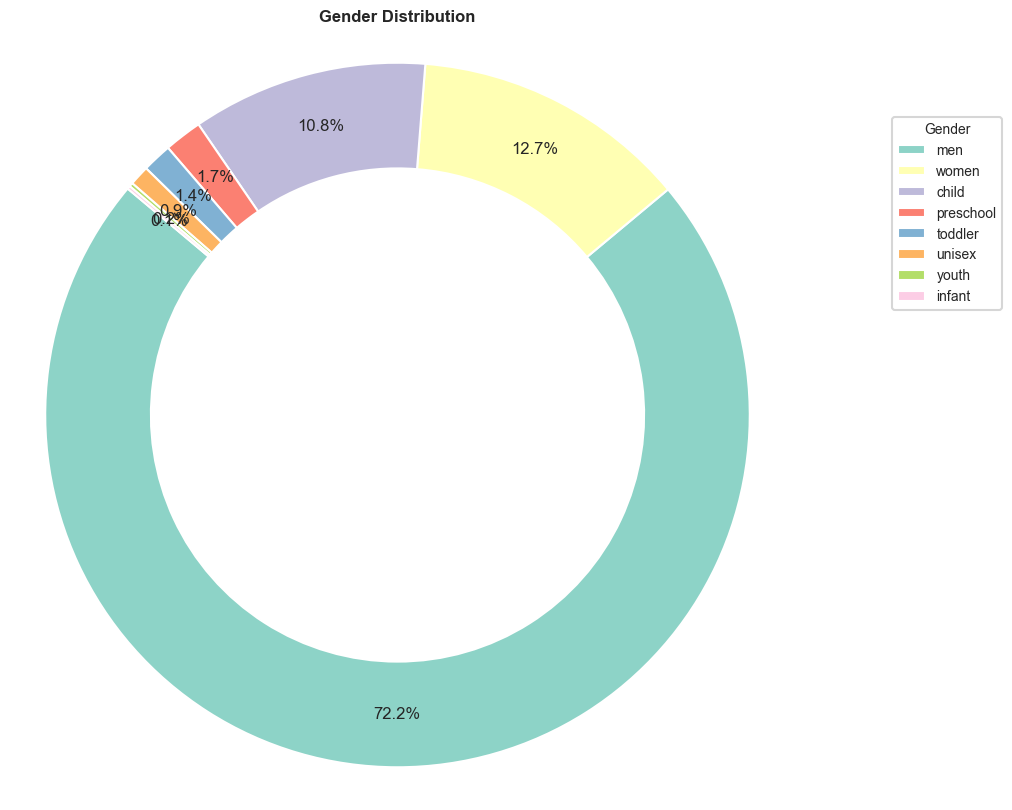

In [102]:
# Calculate the count of each gender
gender_counts = df['GENDER'].value_counts()

# Create a color palette with more distinct colors
colors = sns.color_palette('Set3', n_colors=len(gender_counts))

# Create a pie chart with enhanced styling
plt.figure(figsize=(10, 10))

# Label the percentages outside the pie chart
plt.pie(gender_counts, labels=None, autopct='%1.1f%%', colors=colors, startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.3), textprops={'fontsize': 12})

# Add labels with modified font size
plt.title('Gender Distribution', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.legend(gender_counts.index, title='Gender', bbox_to_anchor=(1, 0.8), loc="upper left", bbox_transform=plt.gcf().transFigure, title_fontsize=10, fontsize=10)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/3269685271.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  boxplot.text(xtick, medians[xtick] + vertical_offset,
/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/3269685271.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  '{:.2f}'.format(medians[xtick]),


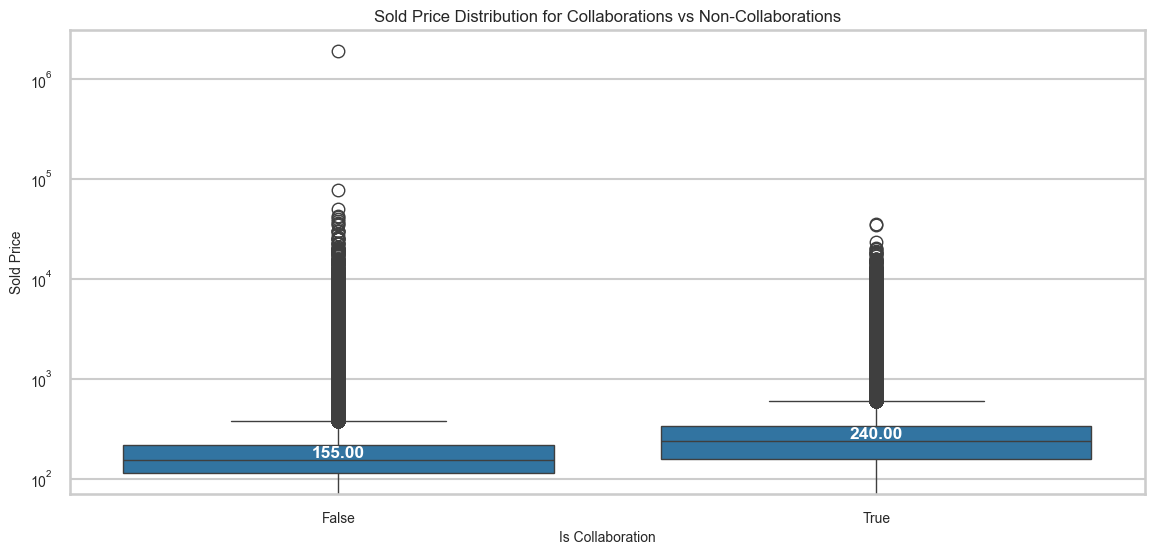

In [67]:
# Boxplot of 'SOLD_PRICE' by 'IS_COLLAB'
# Set plot style for a cleaner look
sns.set_style("whitegrid")
# Create the boxplot with specified figure size
plt.figure(figsize=(12, 6))
# Create the boxplot for 'SOLD_PRICE' by 'IS_COLLAB'
boxplot = sns.boxplot(x='IS_COLLAB', y='SOLD_PRICE', data=df)
# Set the title and labels with appropriate font sizes
boxplot.set_title('Sold Price Distribution for Collaborations vs Non-Collaborations', fontsize=12)
boxplot.set_xlabel('Is Collaboration', fontsize=10)
boxplot.set_ylabel('Sold Price', fontsize=10)
# Adjust tick parameters for better readability
boxplot.tick_params(labelsize=10)
# Optionally, set the y-axis to a logarithmic scale to better display the distribution
boxplot.set(yscale="log")
# Annotate the median values on the plot
medians = df.groupby(['IS_COLLAB'])['SOLD_PRICE'].median()
vertical_offset = df['SOLD_PRICE'].median() * 0.05  # Offset from median for annotation
# Loop over the medians to create annotations
for xtick in boxplot.get_xticks():
    boxplot.text(xtick, medians[xtick] + vertical_offset,
    '{:.2f}'.format(medians[xtick]),
    horizontalalignment='center', size='xx-small', color='w',
    weight='semibold')
# Ensure the plot displays without being cut off
plt.tight_layout()
# Show the plot
plt.show()

/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/2731175256.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y)}k' for y in ax.get_yticks()/1000])


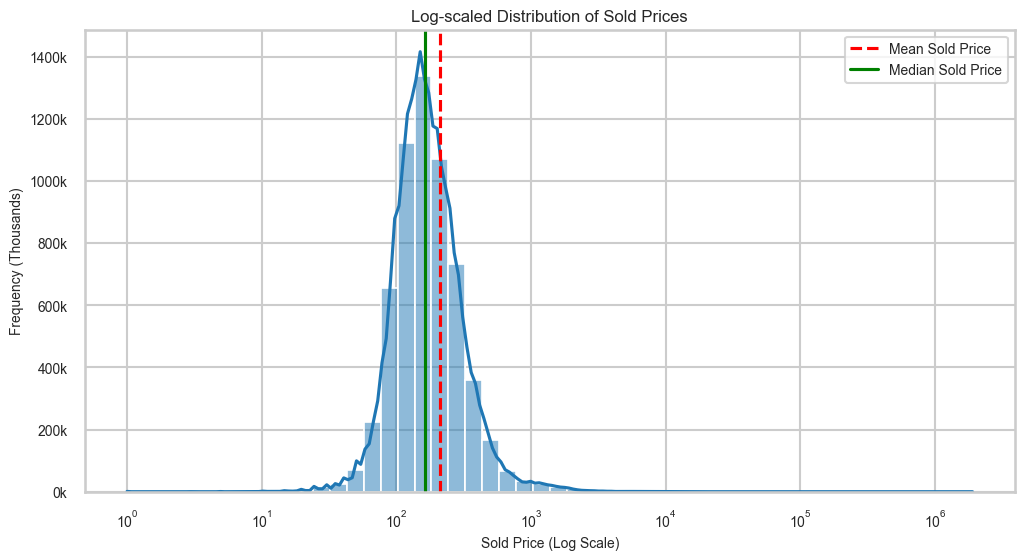

In [97]:
# First, ensure that 'SOLD_PRICE' contains no zero or negative values
df1 = df[df['SOLD_PRICE'] > 0]

# Now let's create the histogram for 'SOLD_PRICE' on a log scale
plt.figure(figsize=(12, 6))
ax = sns.histplot(df1['SOLD_PRICE'], log_scale=True, bins=50, kde=True)

# Set y-ticks to be in thousands
ax.set_yticklabels([f'{int(y)}k' for y in ax.get_yticks()/1000])
plt.tick_params(labelsize=10)
plt.title('Log-scaled Distribution of Sold Prices', fontsize=12)
plt.xlabel('Sold Price (Log Scale)', fontsize=10)
plt.ylabel('Frequency (Thousands)', fontsize=10)

# Add mean and median lines to the histogram
plt.axvline(df1['SOLD_PRICE'].mean(), color='r', linestyle='--', label='Mean Sold Price')
plt.axvline(df1['SOLD_PRICE'].median(), color='g', linestyle='-', label='Median Sold Price')

# Show the legend
plt.legend(fontsize=10)

# Show the plot
plt.show()

In [84]:
# Average sold price by brand
avg_price = df.groupby('BRAND')['SOLD_PRICE'].mean()
print("Average Sold Price by Brand:")

# Styling with pandas Styler
styled_avg_price_by_brand = avg_price_by_brand.to_frame().style.format("{:.2f}")
styled_avg_price_by_brand



Average Sold Price by Brand:


,SOLD_PRICE
BRAND,
ASICS,193.78
Alexander McQueen,281.15
BAPE,323.97
Bait,152.23
Balenciaga,547.58
Burberry,455.70
Common Projects,243.90
Converse,138.10
Crocs,109.97


/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/3722285132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='BRAND', data=df, palette='viridis', order=df['BRAND'].value_counts().index)
/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/3722285132.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y)}k' for y in ax.get_yticks()/1000], fontsize=10)


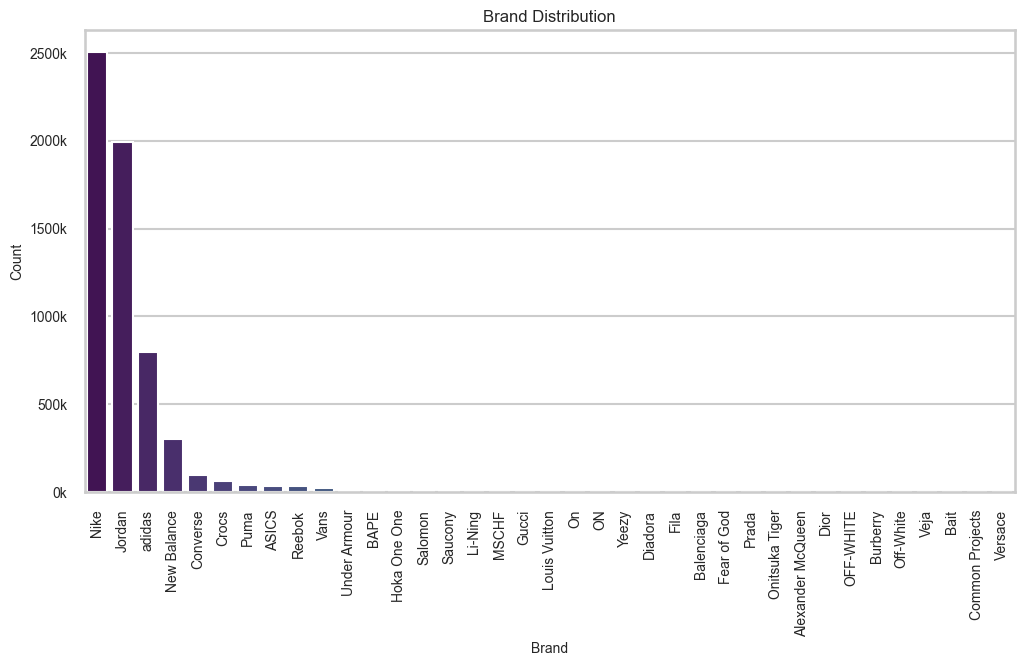

In [89]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='BRAND', data=df, palette='viridis', order=df['BRAND'].value_counts().index)

# Set y-ticks to be in thousands
ax.set_yticklabels([f'{int(y)}k' for y in ax.get_yticks()/1000], fontsize=10)

plt.title('Brand Distribution', fontsize=12)
plt.xlabel('Brand', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tick_params(labelsize=10)
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90, fontsize=10)

plt.show()

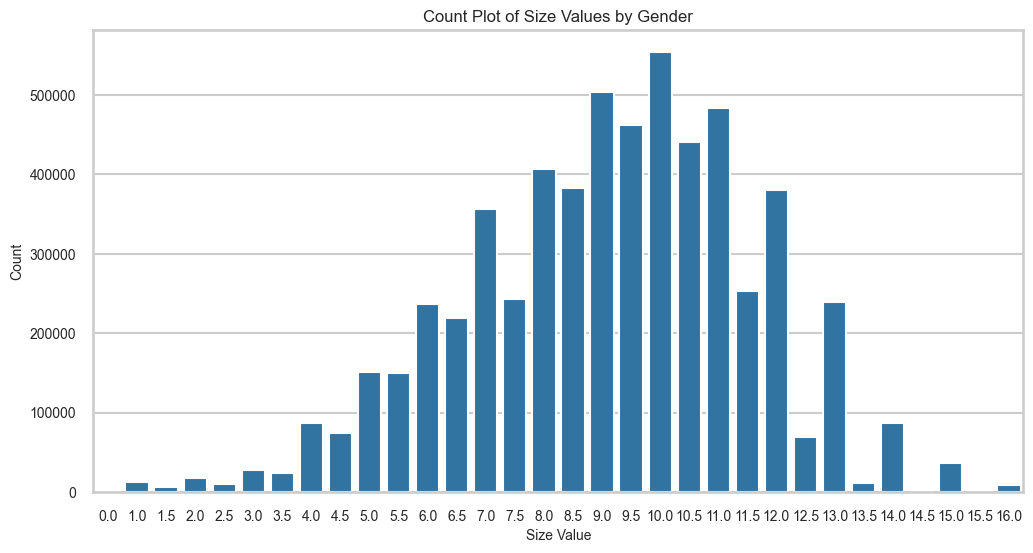

In [94]:
# Create a count plot of SIZE_VALUE based on GENDER
plt.figure(figsize=(12, 6))
sns.countplot(x='SIZE_VALUE', data=df)
plt.title('Count Plot of Size Values by Gender', fontsize=12)
plt.xlabel('Size Value', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tick_params(labelsize=10)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


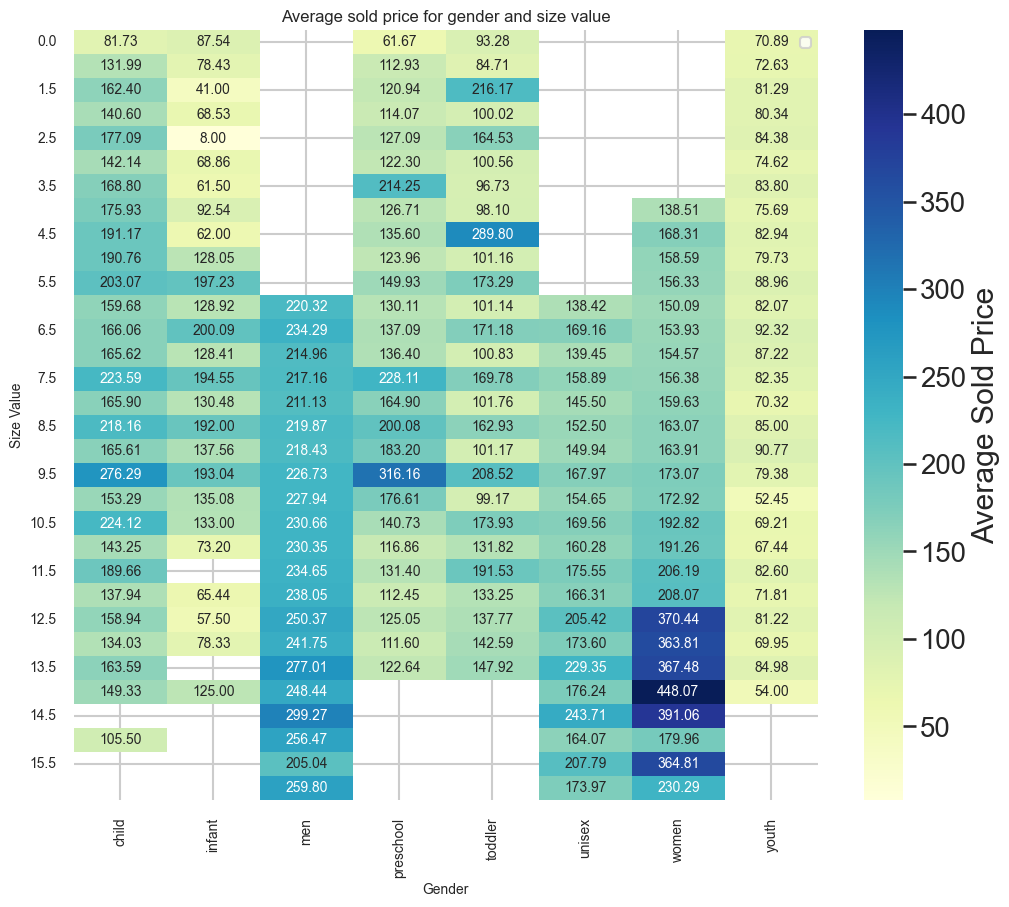

In [117]:
# Create a pivot table for SIZE_VALUE vs. average SOLD_PRICE by GENDER
size_price_heatmap_gender = df.pivot_table(index='SIZE_VALUE', columns='GENDER', values='SOLD_PRICE', aggfunc='mean')

plt.figure(figsize=(12, 10))
sns.heatmap(size_price_heatmap_gender, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average Sold Price'}, annot_kws={'fontsize': 10})
plt.title('Average sold price for gender and size value', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Size Value', fontsize=10)
plt.tick_params(labelsize=10)

plt.show()

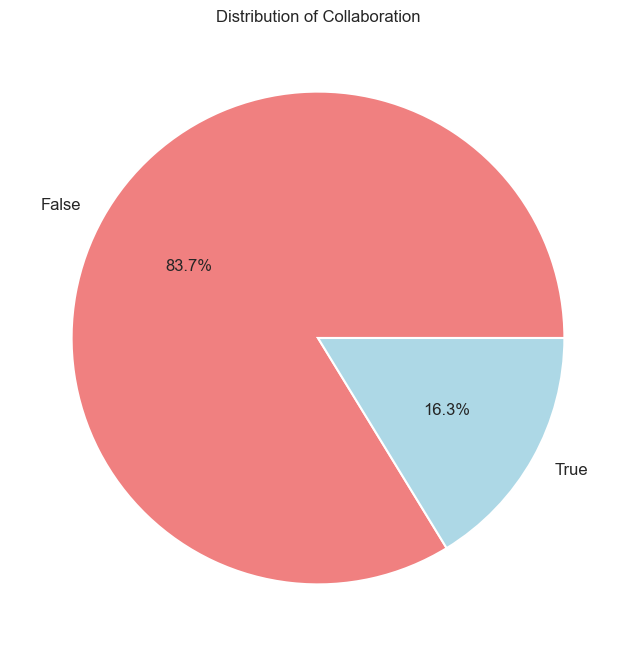

In [100]:
# Calculate the count of each category in IS_COLLAB
collab_counts = df['IS_COLLAB'].value_counts()

# Create a pie chart with reduced font sizes
plt.figure(figsize=(8, 8))
plt.pie(collab_counts, labels=collab_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], textprops={'fontsize': 12})
plt.title('Distribution of Collaboration', fontsize=12)

plt.show()

/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/1832680080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IS_COLLAB', y='SOLD_PRICE', data=avg_sold_prices_collab, palette='pastel')


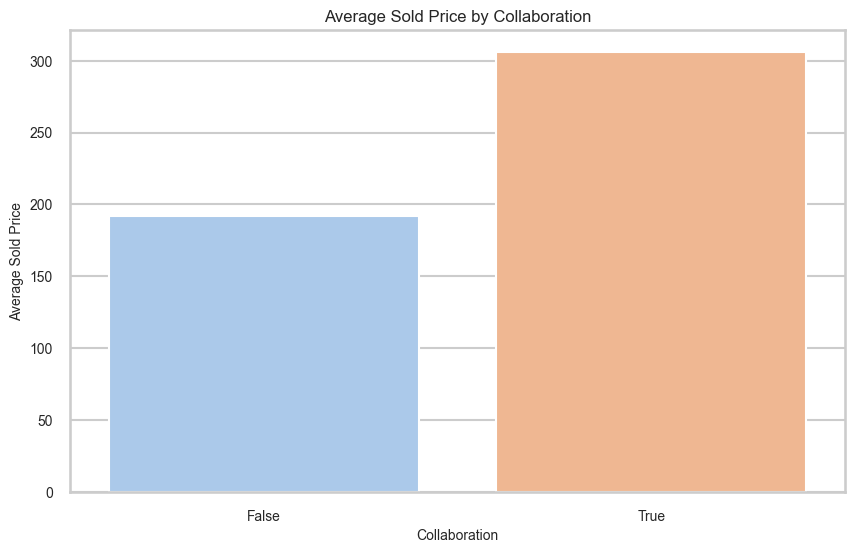

In [114]:
# Calculate average sold prices for each category in IS_COLLAB
avg_sold_prices_collab = df.groupby('IS_COLLAB')['SOLD_PRICE'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='IS_COLLAB', y='SOLD_PRICE', data=avg_sold_prices_collab, palette='pastel')
plt.title('Average Sold Price by Collaboration', fontsize=12)
plt.xlabel('Collaboration', fontsize=10)
plt.ylabel('Average Sold Price', fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/2448773048.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['SOLD_AT'] = pd.to_datetime(df['SOLD_AT'], infer_datetime_format=True, errors='coerce')


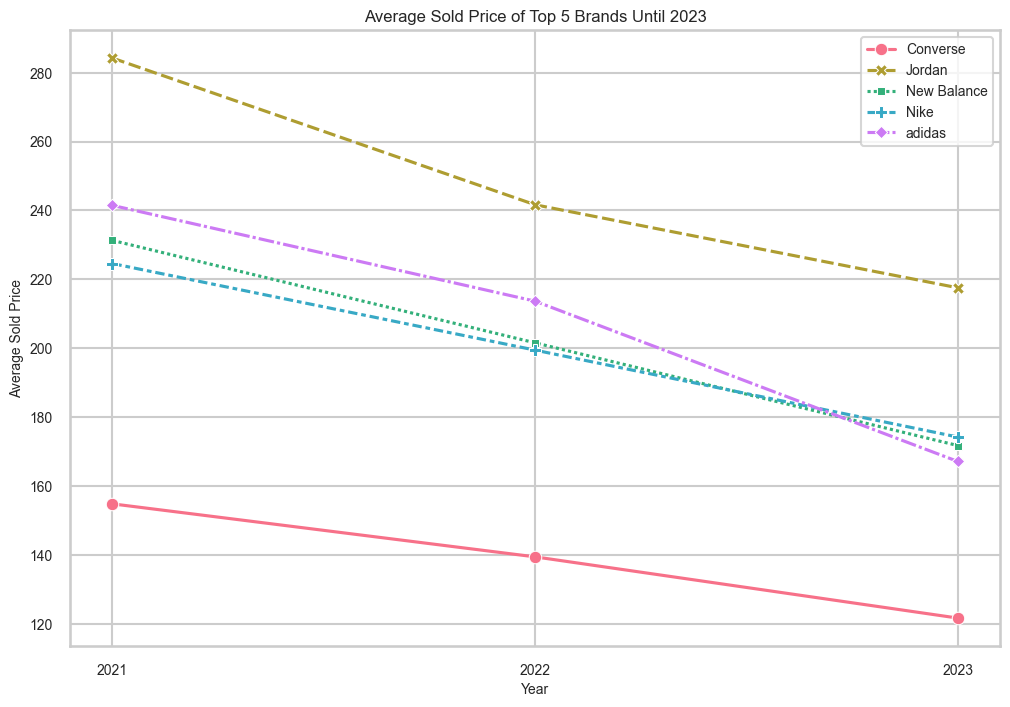

In [116]:
# Assuming df is your DataFrame
df['SOLD_AT'] = pd.to_datetime(df['SOLD_AT'], infer_datetime_format=True, errors='coerce')
df['Year'] = df['SOLD_AT'].dt.year

# Filter for years up to 2023
df_filtered = df[df['Year'] <= 2023]

# Identify the top 5 brands
top_brands = df_filtered['BRAND'].value_counts().nlargest(5).index

# Filter the dataset for the top 5 brands
top_brands_df = df_filtered[df_filtered['BRAND'].isin(top_brands)]

# Group by year and brand, calculate the average sold price
avg_price_by_brand_year = top_brands_df.groupby(['Year', 'BRAND'])['SOLD_PRICE'].mean().reset_index()

# Pivot the table for easy plotting
pivot_table = avg_price_by_brand_year.pivot_table(index='Year', columns='BRAND', values='SOLD_PRICE')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table, markers=True, palette='husl')
plt.title('Average Sold Price of Top 5 Brands Until 2023', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Sold Price', fontsize=10)
plt.tick_params(labelsize=10)
# Set x-axis ticks to show only years
plt.xticks(sorted(df_filtered['Year'].unique()))
plt.legend(fontsize=10)

plt.show()

/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/45168374.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['SOLD_AT'] = pd.to_datetime(df['SOLD_AT'], infer_datetime_format=True, errors='coerce')


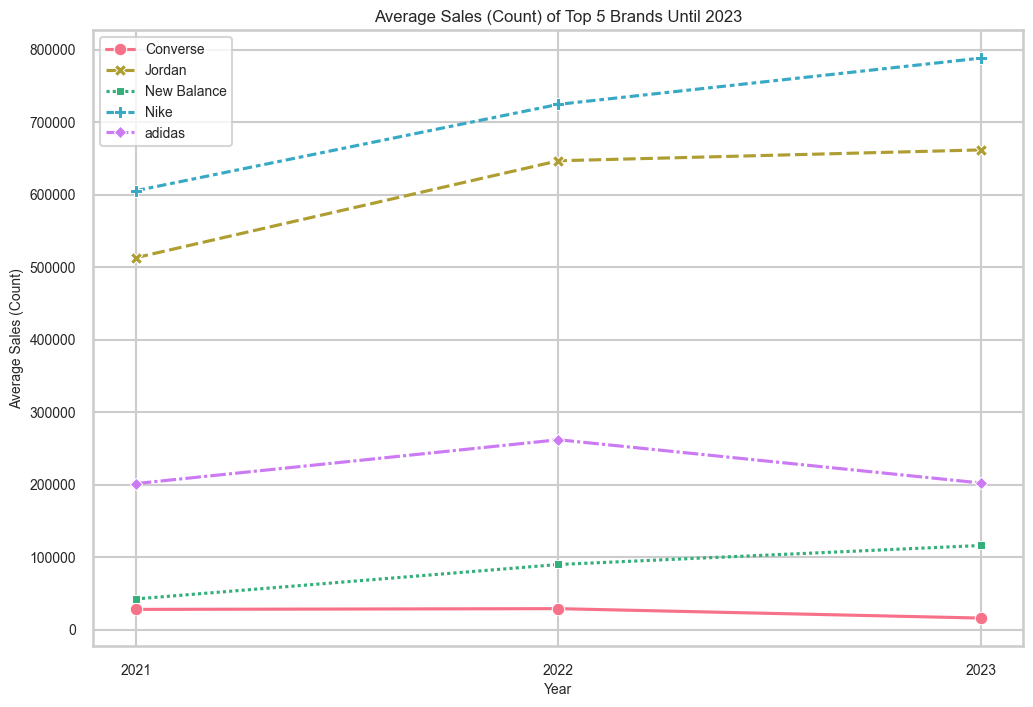

In [119]:
df['SOLD_AT'] = pd.to_datetime(df['SOLD_AT'], infer_datetime_format=True, errors='coerce')
df['Year'] = df['SOLD_AT'].dt.year

# Filter for years up to 2023
df_filtered = df[df['Year'] <= 2023]

# Identify the top 5 brands
top_brands = df_filtered['BRAND'].value_counts().nlargest(5).index

# Filter the dataset for the top 5 brands
top_brands_df = df_filtered[df_filtered['BRAND'].isin(top_brands)]

# Group by year and brand, calculate the average sales (count) for each group
avg_sales_by_brand_year = top_brands_df.groupby(['Year', 'BRAND']).size().reset_index(name='Average_Sales')

# Pivot the table for easy plotting
pivot_table = avg_sales_by_brand_year.pivot_table(index='Year', columns='BRAND', values='Average_Sales', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_table, markers=True, palette='husl')
plt.title('Average Sales (Count) of Top 5 Brands Until 2023', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Average Sales (Count)', fontsize=10)
plt.tick_params(labelsize=10)
# Set x-axis ticks to show only years
plt.xticks(sorted(df_filtered['Year'].unique()))
plt.legend(fontsize=10)
plt.show()

/var/folders/zn/frtcx_8d3mg0lvjd20vlbdh00000gn/T/ipykernel_800/4285764219.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(y/1000)}k' for y in ax.get_yticks()], fontsize=10)


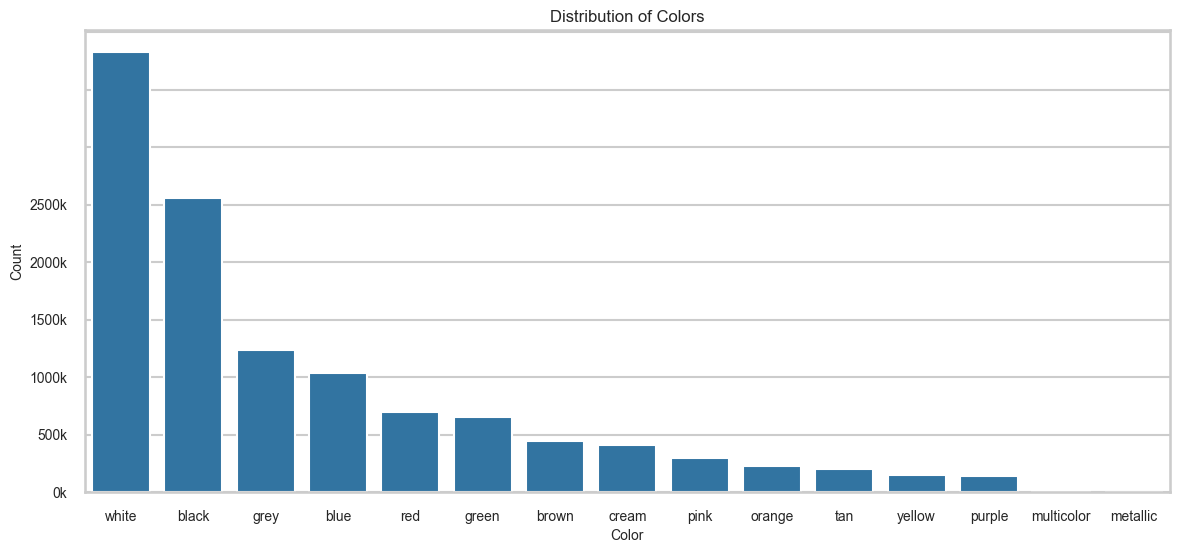

Color Distribution Table:


,COLOR,COUNT,Percentage
0,white,1913487,32.18%
1,black,1279843,21.52%
2,grey,615905,10.36%
3,blue,517172,8.70%
4,red,348873,5.87%
5,green,327192,5.50%
6,brown,223006,3.75%
7,cream,206248,3.47%
8,pink,150385,2.53%
9,orange,111982,1.88%


In [132]:
color_distribution = df['COLOR'].value_counts().reset_index()
color_distribution.columns = ['COLOR', 'COUNT']

# Calculate percentage
color_distribution['Percentage'] = (color_distribution['COUNT'] / color_distribution['COUNT'].sum()) * 100

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='COLOR', y='COUNT', data=color_distribution)

# Set y-ticks to be in thousands
ax.set_yticklabels([f'{int(y/1000)}k' for y in ax.get_yticks()], fontsize=10)

plt.title('Distribution of Colors', fontsize=12)
plt.xlabel('Color', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

# Display table for color distribution
print("Color Distribution Table:")

# Styling with pandas Styler
styled_color_distribution = color_distribution.style.format({'Percentage': '{:.2f}%'})

# Display styled table
display(styled_color_distribution)

([0, 1, 2, 3],
 [Text(0, 0, 'alias'),
  Text(1, 0, 'ebay'),
  Text(2, 0, 'grailed'),
  Text(3, 0, 'stockx')])

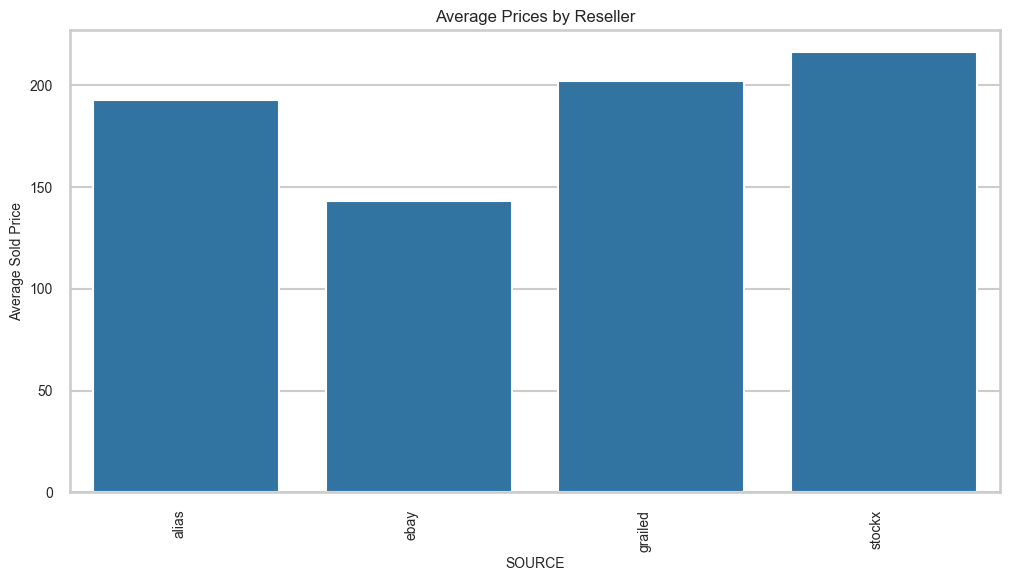

In [135]:
# Average prices by reseller
avg_price_by_reseller = df.groupby('SOURCE')['SOLD_PRICE'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_reseller.index, y=avg_price_by_reseller.values)
plt.title('Average Prices by Reseller', fontsize=12)
plt.xlabel('SOURCE', fontsize=10)
plt.ylabel('Average Sold Price', fontsize=10)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90, ha='right')


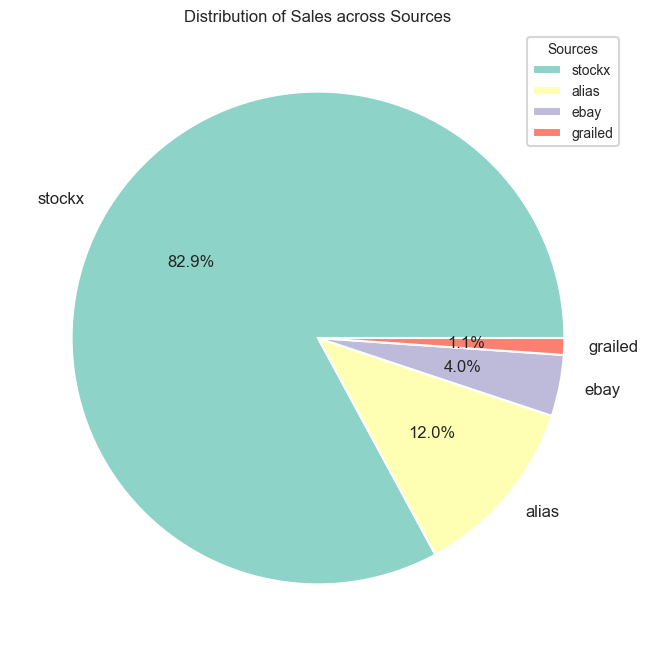

In [142]:
# Calculate the count of each category in IS_COLLAB
collab_counts = df['SOURCE'].value_counts()
# Create a color palette with more distinct colors
colors = sns.color_palette('Set3', n_colors=len(gender_counts))

# Create a pie chart with reduced font sizes
plt.figure(figsize=(8, 8))
plt.pie(collab_counts, labels=collab_counts.index, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 12})
plt.title('Distribution of Sales across Sources', fontsize=12)
plt.legend(title='Sources', title_fontsize=10, fontsize=10)
plt.show()

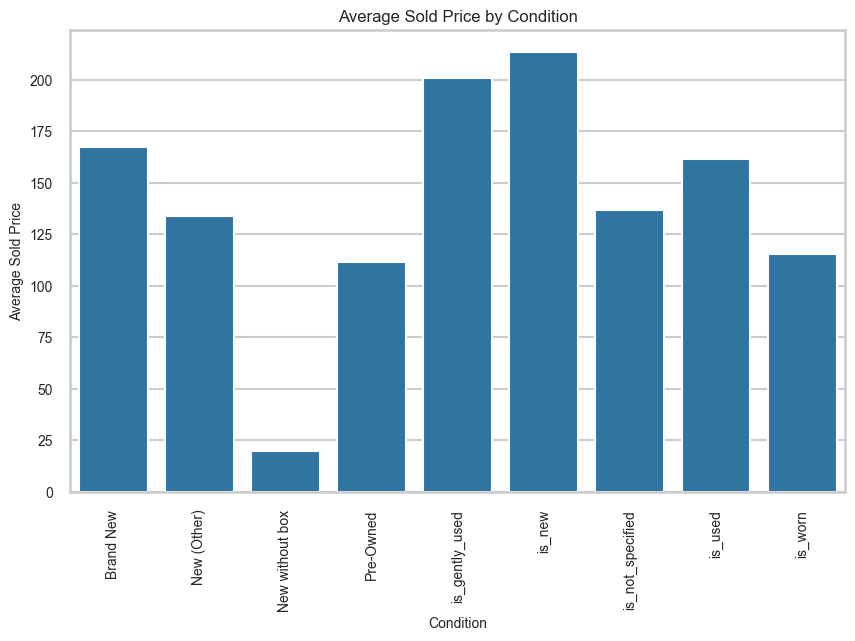

Average Sold Price by Condition Table:


,Condition,Average Sold Price
0,Brand New,167.550543
1,New (Other),133.807258
2,New without box,20.000000
3,Pre-Owned,111.757570
4,is_gently_used,200.655862
5,is_new,213.463703
6,is_not_specified,137.000000
7,is_used,161.498235
8,is_worn,115.573444


In [150]:
# Grouping by condition and calculating average sold price
condition_avg_prices = df.groupby('CONDITION')['SOLD_PRICE'].mean().reset_index()
condition_avg_prices.columns = ['Condition', 'Average Sold Price']

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Condition', y='Average Sold Price', data=condition_avg_prices)
plt.title('Average Sold Price by Condition', fontsize=12)
plt.xlabel('Condition', fontsize=10)
plt.ylabel('Average Sold Price', fontsize=10)
plt.xticks(rotation=90)
plt.tick_params(labelsize=10)
plt.show()

# Displaying the table
print("Average Sold Price by Condition Table:")

# Styling with pandas Styler
styled_condition_avg_prices = condition_avg_prices.style
styled_condition_avg_prices

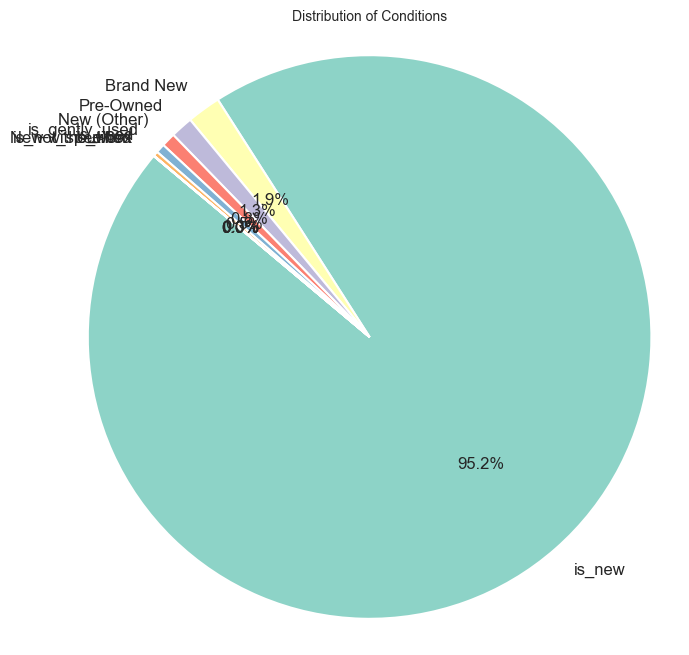

In [152]:
# Counting the occurrences of each condition
condition_counts = df['CONDITION'].value_counts()
# Create a color palette with more distinct colors
colors = sns.color_palette('Set3', n_colors=len(gender_counts))
# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('Distribution of Conditions', fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [148]:
# Grouping by condition and gender, and calculating average sold price
condition_gender_avg_prices = df.groupby(['CONDITION', 'GENDER'])['SOLD_PRICE'].mean().reset_index()
condition_gender_avg_prices.columns = ['Condition', 'Gender', 'Average Sold Price']

# Displaying the table
print("Average Sold Price by Condition and Gender Table:")

# Styling with pandas Styler
styled_condition_gender_avg_prices = condition_gender_avg_prices.style
styled_condition_gender_avg_prices

Average Sold Price by Condition and Gender Table:


,Condition,Gender,Average Sold Price
0,Brand New,child,146.676383
1,Brand New,infant,43.191589
2,Brand New,men,179.388315
3,Brand New,preschool,122.999060
4,Brand New,toddler,88.397709
5,Brand New,unisex,129.897436
6,Brand New,women,134.037206
7,Brand New,youth,59.906623
8,New (Other),child,98.585042
9,New (Other),infant,28.460784
